# Mushrooms 




# Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ''leaflets three, let it be'' for Poisonous Oak and Ivy.

Original data was contributed to UCI Machine Learning Repository: "https://archive.ics.uci.edu/ml/datasets/mushroom"

Time period: Donated to UCI ML on April 27, 1987

# Motivations

1. What machine learning models perform best on this dataset?
2. What features predict the nature of a poisinous mushroom? 

# Obsevations

1. This dataset contains Categorcial Data (No numerical data).
2. Mushrooms are described in terms of physical characteristics. 

In [2]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os 

In [2]:
#path to save the mushrooms.csv file 
os.getcwd()

'C:\\Users\\hanse\\Downloads'

In [3]:
df_mush = pd.read_csv('mushrooms.csv');
df_mush.shape

(8124, 23)

# Exploratory Data Analysis

In [4]:
#Shows all the names of the columns into a list
df_mush.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [5]:
#We can see the data types on each column and see if we have any null values
df_mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Checking for any null values!
df_mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#To get all the columns in display 
pd.set_option('display.max_columns', None)
#To return to defualt settings use: pd.reset_option(“max_columns”)

In [8]:
# brief description of the type of data on each column
df_mush.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape stalk-root  \
count          8124      8124       8124        8124       8124   
unique            2         2         12           2          5   
top               c         b          b           t          b   
freq           6812      5612       1728        4608       3776   

       stalk-surface-above-ring stalk-surface-below-ring  \
count                      8124                     8124   
unique                        4                        4   
top                           s                        s   
freq                       5176                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148

In [72]:
# Shows any duplicates 
df_mush.duplicated().sum()

0

In [10]:
#returns last 10 rows
df_mush.tail(10)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8114     p         f           y         c       f    m               a   
8115     e         x           s         n       f    n               a   
8116     p         k           y         n       f    s               f   
8117     p         k           s         e       f    y               f   
8118     p         k           y         n       f    f               f   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
8114            c         b          y           e          c   
8115            c         b          y           e          ?   
8116            c         n          b           t          ?   
8117            c         n          b           t          ?   
8118            c         n          b           t          ?   
8119            c         b          y           e          ?   
8120            c         b          y           e          ?   
8121            c         b          n           e          ?   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
8114                        k                        y                      c   
8115                        s                        s                      o   
8116                        s                        k                      p   
8117                        k                        s                      p   
8118                        k                        s                      p   
8119                        s                        s                      o   
8120                        s                        s                      o   
8121                        s                        s                      o   
8122                        s                        k                      w   
8123                        s                        s                      o   

     stalk-color-below-ring veil-type veil-color ring-number ring-type  \
8114                      c         p          w           n         n   
8115                      o         p          o           o         p   
8116                      w         p          w           o         e   
8117                      w         p          w           o         e   
8118                      w         p          w           o         e   
8119                      o         p          o           o         p   
8120                      o         p          n           o         p   
8121                      o         p          o           o         p   
8122                      w         p          w           o         e   
8123                      o         p          o           o         p   

     spore-print-color population habitat  
8114                 w          c       d  
8115                 o          v       l  
8116                 w          v       l  
8117                 w          v       d  
8118                 w          v       d  
8119                 b          c       l  
8120                 b          v       l  
8121                 b          c       l  
8122                 w          v       l  
8123                 o          c       l

# Attribute Information (23 Columns): 

1. (classes: edible=e, poisonous=p)

2. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

3. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

4. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

5. bruises: bruises=t, no=f

6. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

7. gill-attachment: attached=a, descending=d, free=f, notched=n

8. gill-spacing: close=c, crowded=w, distant=d

9. gill-size: broad=b, narrow=n

10. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g,  green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

11. stalk-shape: enlarging=e, tapering=t

12. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

13. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

14. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

15. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

16. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

17. veil-type: partial=p, universal=u

18. veil-color: brown=n, orange=o, white=w, yellow=y

19. ring-number: none=n, one=o, two=t

20. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

21. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

22. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

23. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

<div>
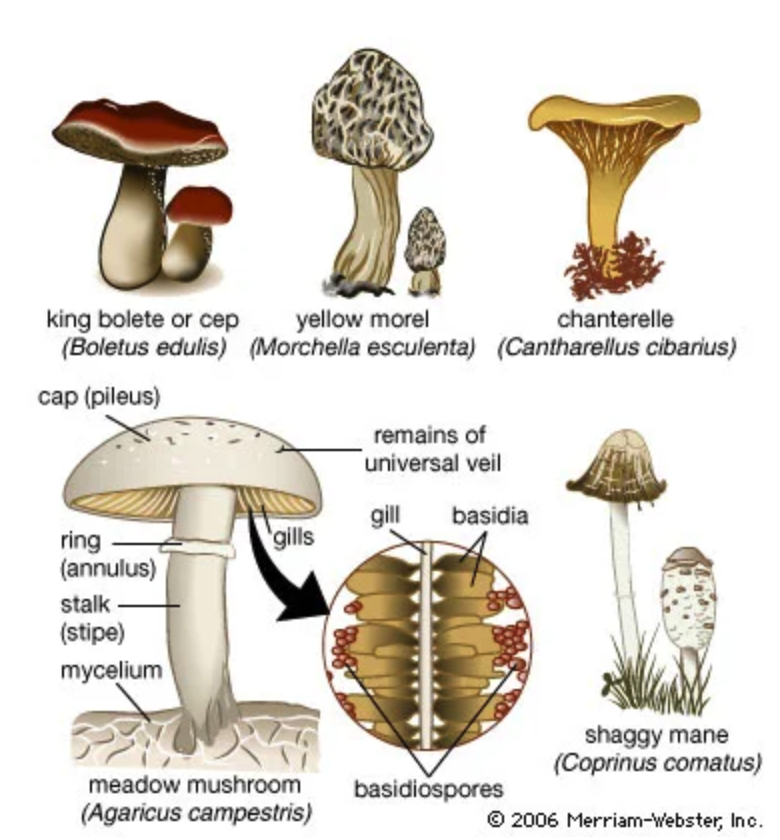
</div>


# Mushrooms Descrption
A mushroom typically consists of a stalk (stipe) and a cap (pileus). As the mushroom develops from an underground mycelium and pushes upward, it is protected by a thin membrane (universal veil), which eventually ruptures, leaving fragments on the cap. Another membrane, attaching the cap to the stalk, also ruptures, allowing the cap to expand and leaving a remnant ring (annulus) on the stalk. Radiating rows of gills are found on the cap's undersurface; these bear the club-shaped reproductive structures (basidia) which form minute spores known as basidiospores, of which a single mushroom may produce millions.

In [11]:
#Counts each unique element in the specific columm 'CLASS'
df_mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [12]:
df_mush['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [13]:
df_mush['class'].unique().tolist()

['p', 'e']

# Visualizations 

In [14]:
#change the dictionary keys to new keys (relabeling)
def change_dict_key(d, old_key, new_key, default_value=None):
    for (i,k) in zip(old_key,new_key):
        d[k] = d.pop(i, default_value)

#turns a dictionary to a series then to a data frame
#to get quantity and percentages of each unique element for a specfic column 
def series_to_df(dict1,column_name):
    series1 = pd.Series(dict1).rename_axis(column_name)
    df1 = pd.DataFrame(series1.reset_index(name='Quantity'))
    df1['Percentage'] = df1['Quantity'].apply(lambda x: round(100*x/(df1['Quantity'].sum()),2))
    df1['Percentage'] = df1['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x))
    return df1

In [15]:
class_dict = df_mush['class'].value_counts().to_dict()
class_ordered = ['edible','poisonous']
change_dict_key(class_dict,list(class_dict.keys()),class_ordered)
df_class = series_to_df(class_dict,'Class')

fig = px.pie(df_class,values = 'Quantity',names = 'Class',color = 'Class',
            color_discrete_sequence = ['skyblue','turquoise'],width = 500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

In [16]:
cap_color_dict = df_mush['cap-color'].value_counts().to_dict()
cap_color_ordered = ['brown','gray','red','yellow','white','buff','pink','cinnamon','purple','green']
change_dict_key(cap_color_dict,list(cap_color_dict.keys()),cap_color_ordered)

colors = ['#653700','gray','red','yellow','white','olive','pink','crimson','purple','green']
df_cap_color = series_to_df(cap_color_dict,'Cap-Colors')

fig = px.bar(df_cap_color, x='Cap-Colors',y='Quantity',title = "Mushroom Cap - Color (Quantity)",
             color_discrete_sequence = colors,color = df_cap_color['Percentage'])
fig.show()

In [17]:
odor_dict = df_mush['odor'].value_counts().to_dict()
odor_ordered = ['none','foul','fishy','spicy','almond','anise','pungent','creosote','musty']
change_dict_key(odor_dict,list(odor_dict.keys()),odor_ordered)
df_odor = series_to_df(odor_dict,'Odor')
colors = ['purple', 'yellow', 'blue', 'violet', 'red', 'pink', 'orange', 'black', 'green']

fig = px.bar(df_odor, x='Odor',y='Quantity',title = "Mushroom Odor (Quantity)",
             color_discrete_sequence = colors,color = df_odor['Percentage'],
            width=700, height=350)
fig.show()

In [18]:
#habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d
habitat_dict = df_mush['habitat'].value_counts().to_dict()
habitat_ordered = ['woods','grasses','paths','leaves','urban','meadows','waste']
change_dict_key(habitat_dict,list(habitat_dict.keys()),habitat_ordered)
df_habitat = series_to_df(habitat_dict,'Habitat')

fig = px.bar(df_habitat, x='Habitat',y='Quantity',title = "Mushroom Habitat (Quantity)",
             color_discrete_sequence = colors,color = df_habitat['Percentage'])
fig.show()

In [19]:
#population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
population_dict = df_mush['population'].value_counts().to_dict()
population_ordered = ['several','solitary','scattered','numerous','abundant','clustered']
change_dict_key(population_dict,list(population_dict.keys()),population_ordered)
df_population = series_to_df(population_dict,'Population')

fig = px.bar(df_population, x='Population',y='Quantity',title = "Mushroom Population (Quantity)",
             color_discrete_sequence = colors,color = df_population['Percentage'])
fig.show()

In [20]:
features = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
            'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
            'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color',
            'population','habitat']
list(enumerate(features))

[(0, 'class'),
 (1, 'cap-shape'),
 (2, 'cap-surface'),
 (3, 'cap-color'),
 (4, 'bruises'),
 (5, 'odor'),
 (6, 'gill-attachment'),
 (7, 'gill-spacing'),
 (8, 'gill-size'),
 (9, 'gill-color'),
 (10, 'stalk-shape'),
 (11, 'stalk-root'),
 (12, 'stalk-surface-above-ring'),
 (13, 'stalk-surface-below-ring'),
 (14, 'stalk-color-above-ring'),
 (15, 'stalk-color-below-ring'),
 (16, 'veil-type'),
 (17, 'veil-color'),
 (18, 'ring-number'),
 (19, 'ring-type'),
 (20, 'spore-print-color'),
 (21, 'population'),
 (22, 'habitat')]

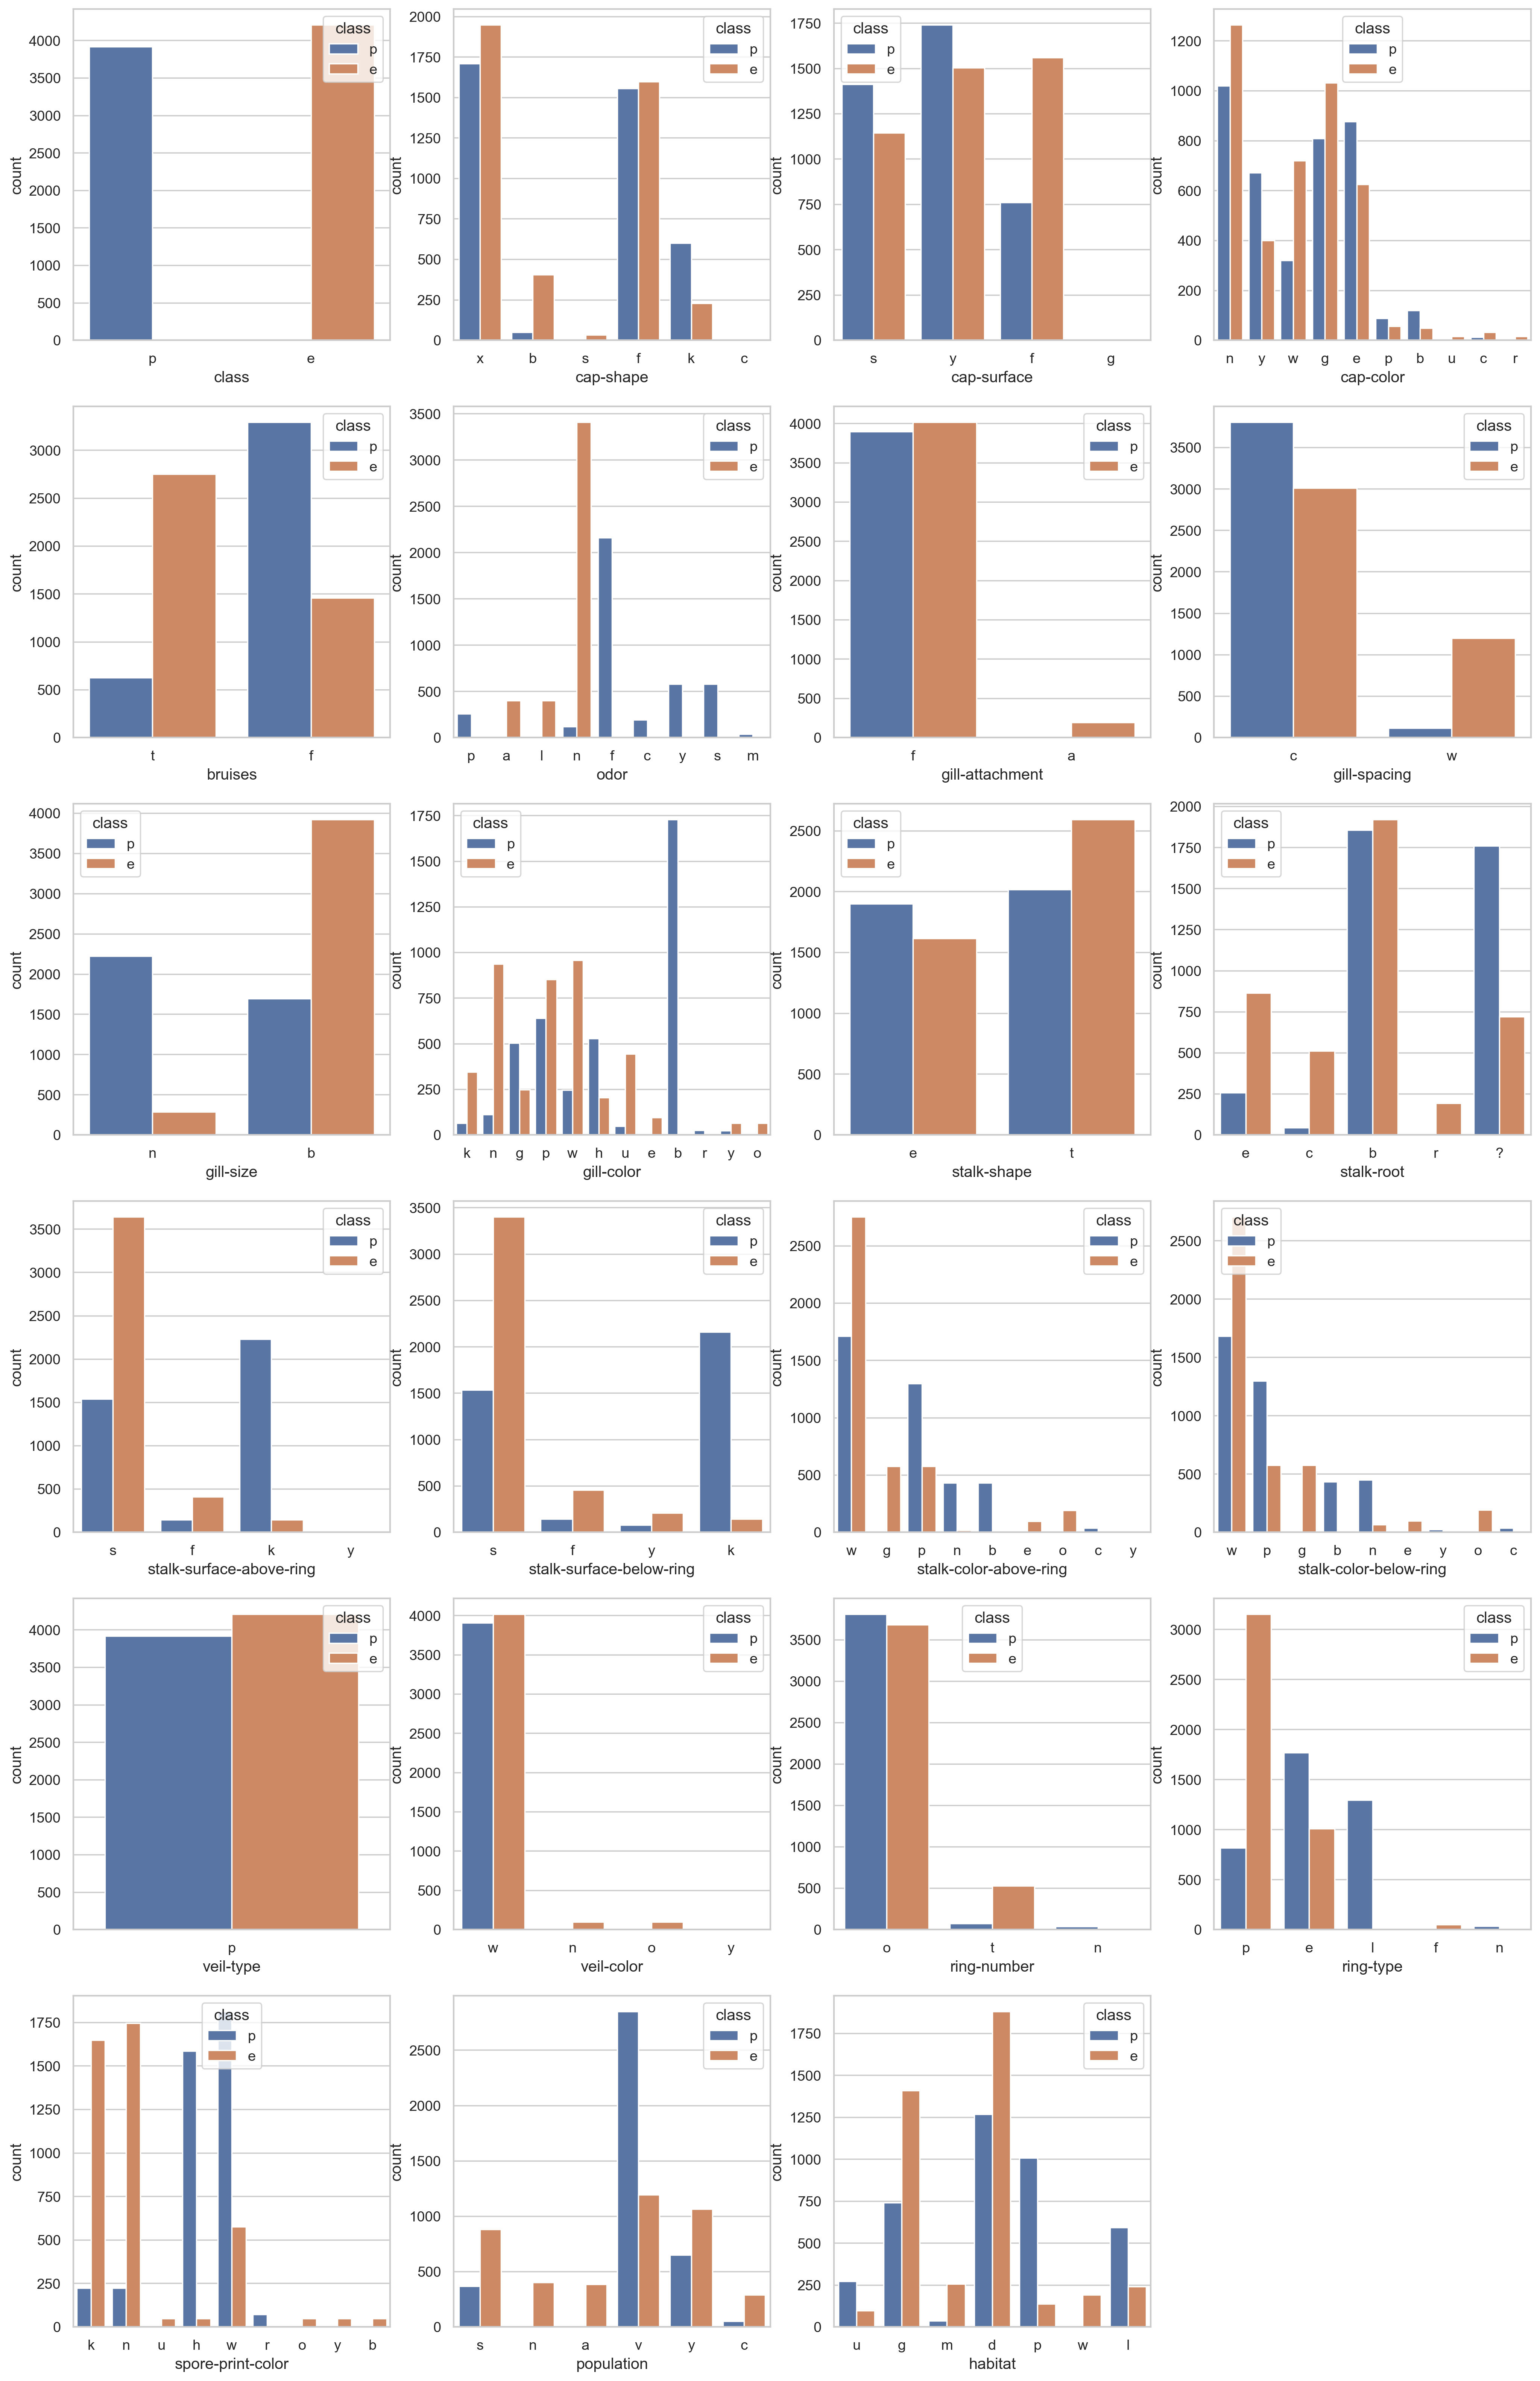

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,32),dpi = 250)
for i in enumerate(features):
    plt.subplot(6,4,i[0]+1)
    sns.countplot(x = i[1],hue = 'class', data = df_mush)

### We choose the best graphs that show a clear distinction between edible and poisonous mushrooms. 

In [22]:
def grouped_count_df(name_column):
    tidy = df_mush.groupby([name_column,'class']).size()
    df = tidy.to_frame(name = 'count').reset_index()
    return df

In [45]:
new_df = grouped_count_df('odor')

fig = px.bar(new_df,x='odor',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Odor Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['p','f','c','y','n','s','m','a','l'],         
        ticktext = ['pungent','foul','creosote','fishy','none','spicy','musty','almond','anise']
   )
 )

fig.show()

In [46]:
new_df = grouped_count_df('cap-color')

fig = px.bar(new_df,x='cap-color',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Cap-Color Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['b','c','e','g','n','p','r','u','w','y'],         
        ticktext = ['buff','cinnamon','red','gray','brown','pink','green','purple','white','yellow']
   )
 )

fig.show()

In [47]:
new_df = grouped_count_df('habitat')

fig = px.bar(new_df,x='habitat',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Habitat Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['d','g','l','m','p','u','w'],         
        ticktext = ['woods','grasses','leaves','meadows','paths','urban','waste']
   )
 )

fig.show()

In [48]:
new_df = grouped_count_df('population')

fig = px.bar(new_df,x='population',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group', title = 'Population Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['a','c','n','s','v','y'],         
        ticktext = ['abundant','clustered','numerous','scattered','several','solitary']
   )
 )

fig.show()

In [50]:
new_df = grouped_count_df('spore-print-color')

fig = px.bar(new_df,x='spore-print-color',y='count',color='class',color_discrete_sequence = ['rgb(207,28,144)','rgb(57,105,172)'],
              barmode='group',title = 'Spore-Print Color Based on Class')

fig.update_layout(
        xaxis = dict(
        tickmode = 'array',
        tickvals = ['b','h','k','n','o','u','w','y','r'],         
        ticktext = ['buff','chocolate','black','brown','orange','purple','white','yellow','green']
   )
 )

fig.show()

# Algorithms

In [32]:
# We turn the categorical data into numerical data 
# Preparation for modeling
le = LabelEncoder()
encoded_mush = df_mush.apply(le.fit_transform)

encoded_mush.head(10)

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   
5      0          5            3          9        1     0                1   
6      0          0            2          8        1     0                1   
7      0          0            3          8        1     3                1   
8      1          5            3          8        1     6                1   
9      0          0            2          9        1     0                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0             0          1           4            0           3   
1             0          0           4            0           2   
2             0          0           5            0           2   
3             0          1           5            0           3   
4             1          0           4            1           3   
5             0          0           5            0           2   
6             0          0           2            0           2   
7             0          0           5            0           2   
8             0          1           7            0           3   
9             0          0           2            0           2   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7   
1                         2                         2                       7   
2                         2                         2                       7   
3                         2                         2                       7   
4                         2                         2                       7   
5                         2                         2                       7   
6                         2                         2                       7   
7                         2                         2                       7   
8                         2                         2                       7   
9                         2                         2                       7   

   stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                       7          0           2            1          4   
1                       7          0           2            1          4   
2                       7          0           2            1          4   
3                       7          0           2            1          4   
4                       7          0           2            1          0   
5                       7          0           2            1          4   
6                       7          0           2            1          4   
7                       7          0           2            1          4   
8                       7          0           2            1          4   
9                       7          0           2            1          4   

   spore-print-color  population  habitat  
0                  2           3        5  
1                  3           2        1  
2                  3           2        3  
3                  2           3        5  
4                  3           0        1  
5                  2           2        1  
6                  2           2        3  
7                  3           3        3  
8                  2           4        1  
9                  2           3        3

In [52]:
#Check the Max on each column
encoded_mush.max()

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-root                   4
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-type                    0
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int64

In [53]:
# Statistics
encoded_mush.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       stalk-shape   stalk-root  stalk-surface-above-ring  \
count  8124.000000  8124.000000               8124.000000   
mean      0.567208     1.109798                  1.575086   
std       0.495493     1.061106                  0.621459   
min       0.000000     0.000000                  0.000000   
25%       0.000000     0.000000                  1.000000   
50%       1.000000     1.000000                  2.000000   
75%       1.000000     1.000000                  2.000000   
max       1.000000     4.000000                  3.000000   

       stalk-surface-below-ring  stalk-color-above-ring  \
count               8124.000000             8124.000000   
mean                   1.603644                5.816347   
std                    0.675974                1.901747   
min                    0.000000                0.000000   
25%                    1.000000                6.000000   
50%                    2.000000                7.000000   
75%                    2.000000                7.000000   
max                    3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             8124.000000     8124.0  8124.000000  8124.000000   
mean                 5.794682        0.0     1.965534     1.069424   
std                  1.907291        0.0     0.242669     0.271064   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  8124.000000        8124.000000  8124.000000  8124.000000  
mean      2.291974           3.596750     3.644018     1.508616  
std       1.801672           2.382663     1.252082     1.719975  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000

In [37]:
# Uses the corr method from pandas to see how the variables are correlated
mush_corr = encoded_mush.corr()
mush_corr

class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0.089090  -0.060837   
stalk-surface-below-ring -0.298801  -0.032591     0.107965  -0.047710   
stalk-color-above-ring   -0.154003  -0.031659     0.066050   0.002364   
stalk-color-below-ring   -0.146730  -0.030390     0.068885   0.008057   
veil-type                      NaN        NaN          NaN        NaN   
veil-color                0.145142   0.072560    -0.016603   0.036130   
ring-number              -0.214366  -0.106534    -0.026147  -0.005822   
ring-type                -0.411771  -0.025457    -0.106407   0.162513   
spore-print-color         0.171961  -0.073416     0.230364  -0.293523   
population                0.298686   0.063413     0.021555  -0.144770   
habitat                   0.217179  -0.042221     0.163887   0.033925   

                           bruises      odor  gill-attachment  gill-spacing  \
class                    -0.501530 -0.093552         0.129200     -0.348387   
cap-shape                -0.035374 -0.021935         0.078865      0.013196   
cap-surface               0.070228  0.045233        -0.034180     -0.282306   
cap-color                -0.000764 -0.387121         0.041436      0.144259   
bruises                   1.000000 -0.061825         0.137359     -0.299473   
odor                     -0.061825  1.000000        -0.059590      0.063936   
gill-attachment           0.137359 -0.059590         1.000000      0.071489   
gill-spacing             -0.299473  0.063936         0.071489      1.000000   
gill-size                -0.369596  0.310495         0.108984     -0.108333   
gill-color                0.527120 -0.129213        -0.128567      0.100193   
stalk-shape               0.099364  0.459766         0.186485      0.080895   
stalk-root                0.244188 -0.205215         0.144063      0.350548   
stalk-surface-above-ring  0.460824  0.118617        -0.088916     -0.212359   
stalk-surface-below-ring  0.458983  0.061820        -0.116177     -0.213775   
stalk-color-above-ring    0.083538  0.174532         0.099299      0.274574   
stalk-color-below-ring    0.092874  0.169407         0.097160      0.253505   
veil-type                      NaN       NaN              NaN           NaN   
veil-color                0.119770 -0.057747         0.897518      0.073363   
ring-number               0.056788  0.111905         0.093236      0.243014   
ring-type                 0.692973 -0.281387        -0.146689     -0.195897   
spore-print-color        -0.285008  0.469055        -0.029524      0.047323   
population                0.088137 -0.043623         0.165575     -0.529253   
habitat                  -0.075095 -0.026610        -0.030304     -0.154680   

                          gill-size  gill-color  stalk-shape  stalk-root  \
class                      0.540024   -0.530566    -0.102019   -0.379361   
cap-shape                  0.054050   -0.006039     0.063794    0.030191   
cap-surface                0.208100   -0.161017    -0.014123   -0.126245   
cap-color                 -0.169464    0.084659    -0.456496    0.321274   

<AxesSubplot:>

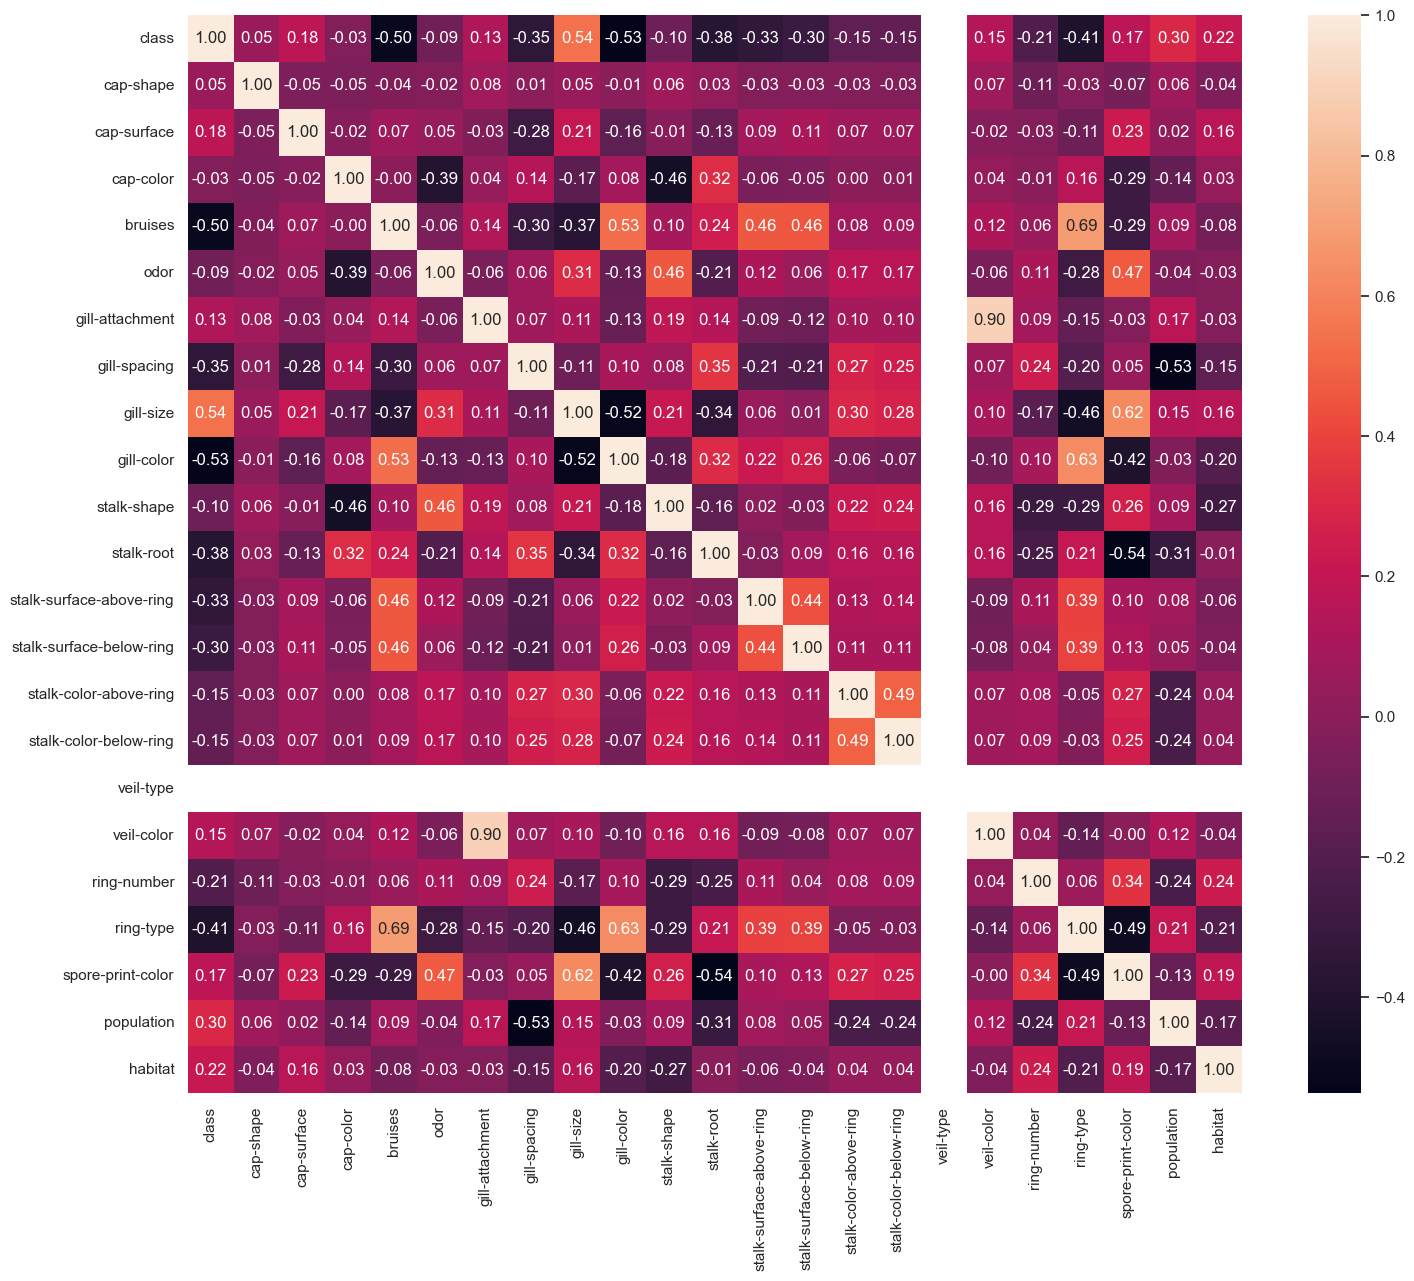

In [44]:
# Heat map of the correlation between Variables
plt.figure(figsize=(17,14))

sns.heatmap(mush_corr, annot=True, fmt = '.2f')

In [64]:
# Split Train Test Data 

# the method .values turns the column into a numpy array 
y = encoded_mush['class'].values
x = encoded_mush.drop(['class'],axis=1)

#Split the data using a test size of 25 percent
x_mush_train,x_mush_test,y_mush_train,y_mush_test = train_test_split(x,y,random_state=42,test_size = 0.25)

In [65]:
x_mush_train.shape, y_mush_train.shape

((6093, 22), (6093,))

In [66]:
x_mush_test.shape, y_mush_test.shape

((2031, 22), (2031,))

In [67]:
df_mush.shape

(8124, 23)

In [68]:
#To ensure Training/Test set are 75/25
6093/8124, 2031/8124

(0.75, 0.25)

In [69]:
x_mush_train

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
3887          5            2          8        0     1                1   
4119          2            0          9        0     2                1   
1600          5            3          3        1     5                1   
4988          5            3          9        0     2                1   
6757          2            3          4        0     2                1   
...         ...          ...        ...      ...   ...              ...   
5226          5            3          4        0     2                1   
5390          3            3          2        1     5                1   
860           2            3          4        1     3                1   
7603          3            2          2        0     2                1   
7270          3            0          3        0     5                1   

      gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
3887             0          1           5            0           1   
4119             0          0           3            0           1   
1600             0          0           5            1           1   
4988             0          0           7            0           1   
6757             0          1           0            1           0   
...            ...        ...         ...          ...         ...   
5226             0          1           0            1           0   
5390             0          0          10            0           0   
860              0          0          10            0           4   
7603             0          1           0            1           0   
7270             1          0           2            0           0   

      stalk-surface-above-ring  stalk-surface-below-ring  \
3887                         2                         2   
4119                         1                         1   
1600                         2                         2   
4988                         1                         1   
6757                         2                         1   
...                        ...                       ...   
5226                         1                         2   
5390                         2                         2   
860                          2                         3   
7603                         2                         2   
7270                         2                         1   

      stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
3887                       7                       7          0           2   
4119                       4                       0          0           2   
1600                       6                       3          0           2   
4988                       4                       4          0           2   
6757                       7                       6          0           2   
...                      ...                     ...        ...         ...   
5226                       6                       7          0           2   
5390                       7                       2          0           2   
860                        7                       7          0           2   
7603                       6                       6          0           2   
7270                       7                       7          0           2   

      ring-number  ring-type  spore-print-color  population  habitat  
3887            1          4                  3           3        0  
4119            1          2                  1           4        1  
1600            1          4                  2           5        0  
4988            1          2                  1           5        4  
6757            1          0                  7           4        0  
...           ...        ...                ...         ...      ...  
5226            1          0                  7           4        4  
5390            2         

In [70]:
y_mush_train

array([1, 1, 0, ..., 0, 1, 0])